In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.api import SimpleExpSmoothing
from statsmodels.tsa.api import ExponentialSmoothing

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

C:\Users\Manish\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
C:\Users\Manish\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


## TASK - 1

In [2]:
#1
# read the datasets
df = pd.read_csv("C:\\Users\\Manish\\Downloads\\DS3_C1_S2_Weather_Data_Practice.csv", parse_dates=['Date'])
df

,Date,Temp
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8
...,...,...
3645,1990-12-27,14.0
3646,1990-12-28,13.6
3647,1990-12-29,13.5
3648,1990-12-30,15.7


In [3]:
df.dtypes

Date    datetime64[ns]
Temp           float64
dtype: object

In [4]:
df=df.set_index('Date')
print(df)

            Temp
Date            
1981-01-01  20.7
1981-01-02  17.9
1981-01-03  18.8
1981-01-04  14.6
1981-01-05  15.8
...          ...
1990-12-27  14.0
1990-12-28  13.6
1990-12-29  13.5
1990-12-30  15.7
1990-12-31  13.0

[3650 rows x 1 columns]


In [5]:
#2
lags = 4
moving_avg = df.rolling(window=lags).mean()

In [6]:
df1= pd.DataFrame({'actual':df['Temp'], 'ma':moving_avg['Temp']})
df1

,actual,ma
Date,,
1981-01-01,20.7,NaN
1981-01-02,17.9,NaN
1981-01-03,18.8,NaN
1981-01-04,14.6,18.000
1981-01-05,15.8,16.775
...,...,...
1990-12-27,14.0,12.875
1990-12-28,13.6,13.775
1990-12-29,13.5,13.925


In [7]:
df1.isnull().sum()

actual    0
ma        3
dtype: int64

In [8]:
df2=df1.dropna()

In [9]:
df2

,actual,ma
Date,,
1981-01-04,14.6,18.000
1981-01-05,15.8,16.775
1981-01-06,15.8,16.250
1981-01-07,15.8,15.500
1981-01-08,17.4,16.200
...,...,...
1990-12-27,14.0,12.875
1990-12-28,13.6,13.775
1990-12-29,13.5,13.925


In [10]:
df2.actual.head(lags).mean()

15.5

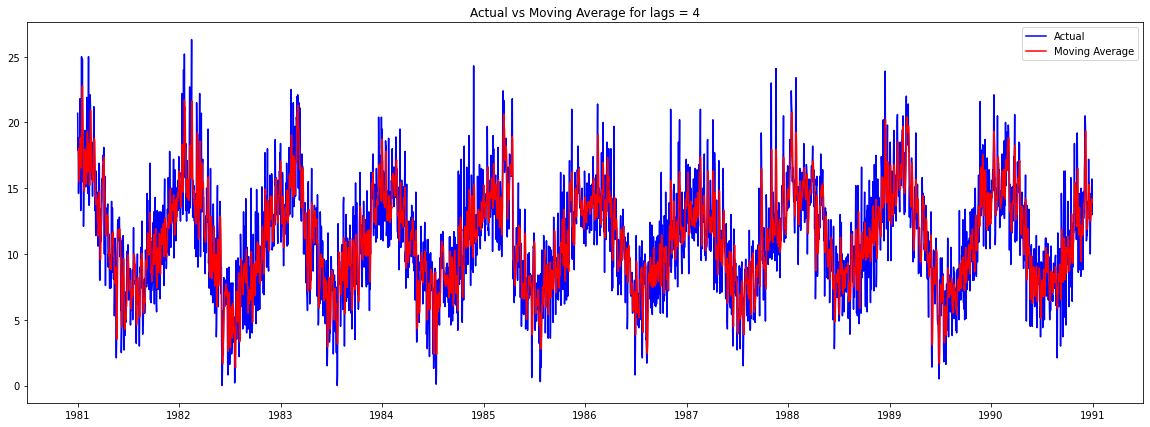

In [11]:
fig,ax = plt.subplots(1,1,figsize=(20,7))
plt.plot(df1.actual, color='blue',label = 'Actual')
plt.plot(df1.ma, color='red', label = 'Moving Average')
plt.title('Actual vs Moving Average for lags = ' + str(lags))
plt.legend()
plt.show()

## TASK - 2

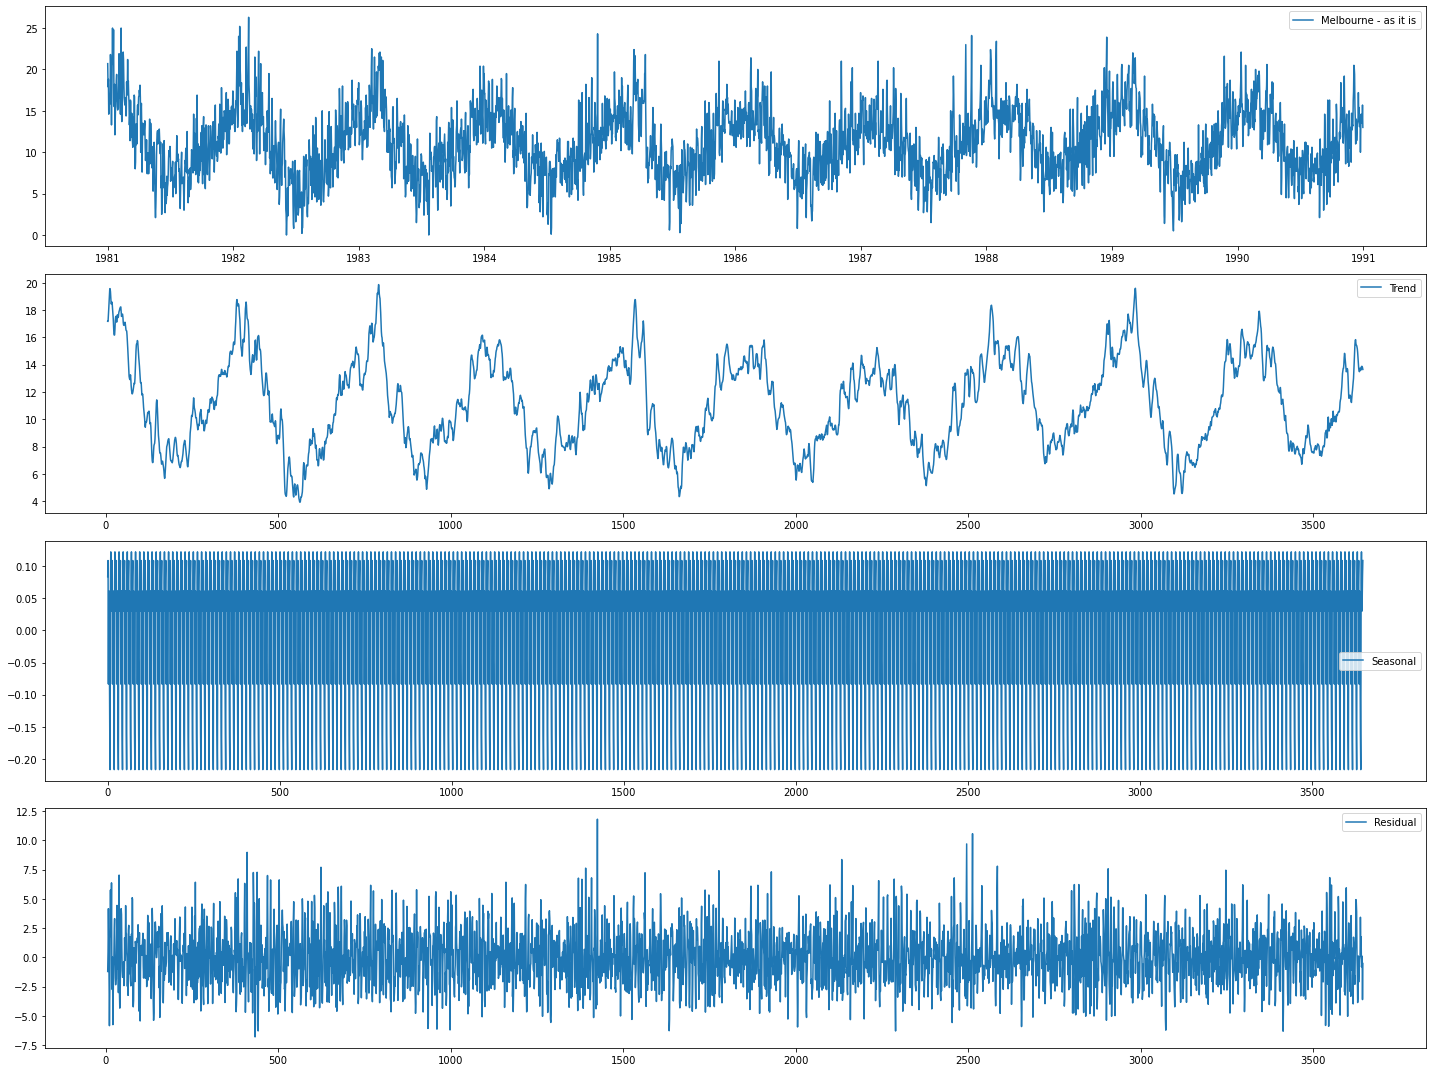

In [12]:
decomposition=seasonal_decompose(np.asarray(df), freq=12)
d_trend=decomposition.trend
d_seasonal=decomposition.seasonal
d_residual=decomposition.resid

# plotting all the 4 graphs
fig,ax = plt.subplots(4,1,figsize=(20,15))

plt.subplot(411)
plt.plot(df.Temp,label='Melbourne - as it is')
plt.legend(loc='best')

plt.subplot(412)
plt.plot(d_trend,label='Trend')
plt.legend(loc='best')

plt.subplot(413)
plt.plot(d_seasonal,label='Seasonal')
plt.legend(loc='best')

plt.subplot(414)
plt.plot(d_residual,label='Residual')
plt.legend(loc='best')

plt.tight_layout()

## TASK - 3

In [13]:
# read the file
path="C:\\Users\\Manish\\Downloads\\DS3_C1_S2_Weather_Data_Practice.csv"
stock = pd.read_csv(path)
# take the feature to do forecast
mystock = stock[['Temp']]
print(mystock)

      Temp
0     20.7
1     17.9
2     18.8
3     14.6
4     15.8
...    ...
3645  14.0
3646  13.6
3647  13.5
3648  15.7
3649  13.0

[3650 rows x 1 columns]


In [14]:

# ADF test to determine data stationarity
from statsmodels.tsa.stattools import adfuller
def checkStationarity(data):
    pvalue = adfuller(data['Temp'])[1]

    if pvalue < 0.05:
        msg = "pvalue={}. Data is Stationary. Proceed to model building".format(pvalue)
    else:
        msg = "pvalue={}. Data is not Stationary. Make the data stationary before model building".format(pvalue)

    return msg

In [15]:
print(checkStationarity(mystock))

pvalue=0.0002470826300361156. Data is Stationary. Proceed to model building


In [16]:
# difference the data by 1 (default)
diff_mystock = mystock - mystock.shift()
print(diff_mystock)

      Temp
0      NaN
1     -2.8
2      0.9
3     -4.2
4      1.2
...    ...
3645  -0.6
3646  -0.4
3647  -0.1
3648   2.2
3649  -2.7

[3650 rows x 1 columns]


In [17]:
# remove the Nulls from the differenced data
print('Before removing Nulls,total records = ', len(diff_mystock))
diff_mystock.dropna(inplace = True)
print('After removing Nulls, total records = ', len(diff_mystock))
print(diff_mystock)

Before removing Nulls,total records =  3650
After removing Nulls, total records =  3649
      Temp
1     -2.8
2      0.9
3     -4.2
4      1.2
5      0.0
...    ...
3645  -0.6
3646  -0.4
3647  -0.1
3648   2.2
3649  -2.7

[3649 rows x 1 columns]


In [18]:
#check if the differenced data is stationary
checkStationarity(diff_mystock)

'pvalue=2.6815618226749474e-30. Data is Stationary. Proceed to model building'

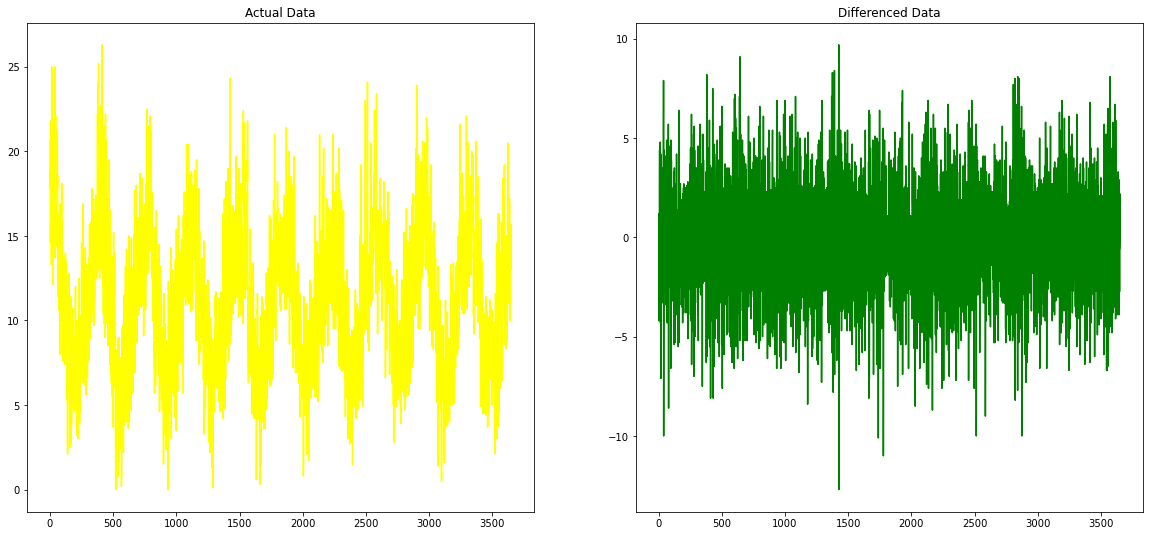

In [19]:
# plot the Actual data and Differenced data
fig,ax = plt.subplots(1,2,figsize=(20, 9))
plt.title("Actual vs Differenced data")
plt.subplot(121)
plt.plot(mystock,color='yellow')
plt.title('Actual Data')

plt.subplot(122)
plt.plot(diff_mystock,color='green')
plt.title('Differenced Data')
plt.show()



## TASK - 4 

In [20]:
#Simple Exponent - when there is no trend/seasonality

def simplesmoothing(data,alpha):
    model = SimpleExpSmoothing(data).fit(smoothing_level=alpha,optimized=False)
    pdct = model.fittedvalues
    df = pd.DataFrame({'actual':data, 'forecast':pdct})              
    return(model,df)

In [21]:
data = df['Temp']

In [22]:
# create forecast for different values of alpha. Plot and understand the charts
# dictionary to store the forecast for each alpha

d_simple_exp = {}
alphas = [0, 0.2, 0.6, 0.8]

for a in alphas:
    model, df = simplesmoothing(data,a)
    d_simple_exp[a] = df.forecast 

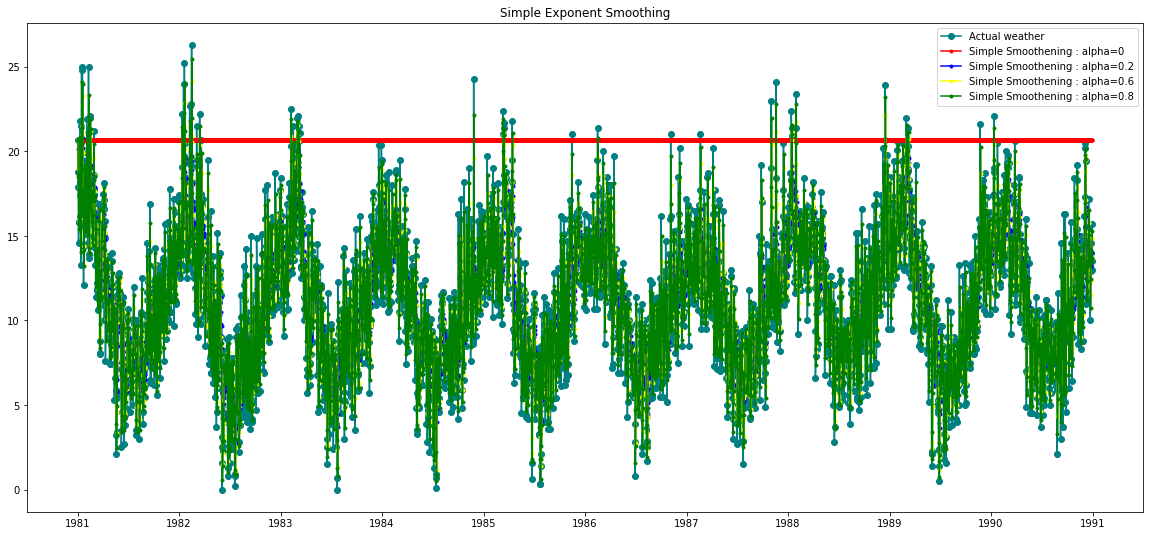

In [23]:
colors = ['red', 'blue', 'yellow', 'green']  

# plot the actual and forecast data
fig,ax = plt.subplots(1,1,figsize=(20, 9))
plt.plot(data, marker='o', color='teal',label='Actual weather ')

for i in range(len(alphas)):
    plt.plot(d_simple_exp[alphas[i]],marker='.',color=colors[i],label='Simple Smoothening : alpha=' + str(alphas[i]))

plt.title('Simple Exponent Smoothing')
plt.legend()
plt.show()

#### Double Exponent Smoothing (trend and no seasonality)

In [24]:
#Double Exponent - when there is a trend, no seasonality (Holts' method) 
# parameters: alpha, beta

model = ExponentialSmoothing(data,trend='additive').fit(smoothing_level=0.2, smoothing_slope=0.5)

# forecast with double exponent smoothing
f_dexp = model.fittedvalues
print(f_dexp)

Date
1981-01-01    16.180404
1981-01-02    17.000643
1981-01-03    17.186771
1981-01-04    17.676996
1981-01-05    16.921476
                ...    
1990-12-27    13.729330
1990-12-28    13.645129
1990-12-29    13.493255
1990-12-30    13.352431
1990-12-31    13.914528
Length: 3650, dtype: float64


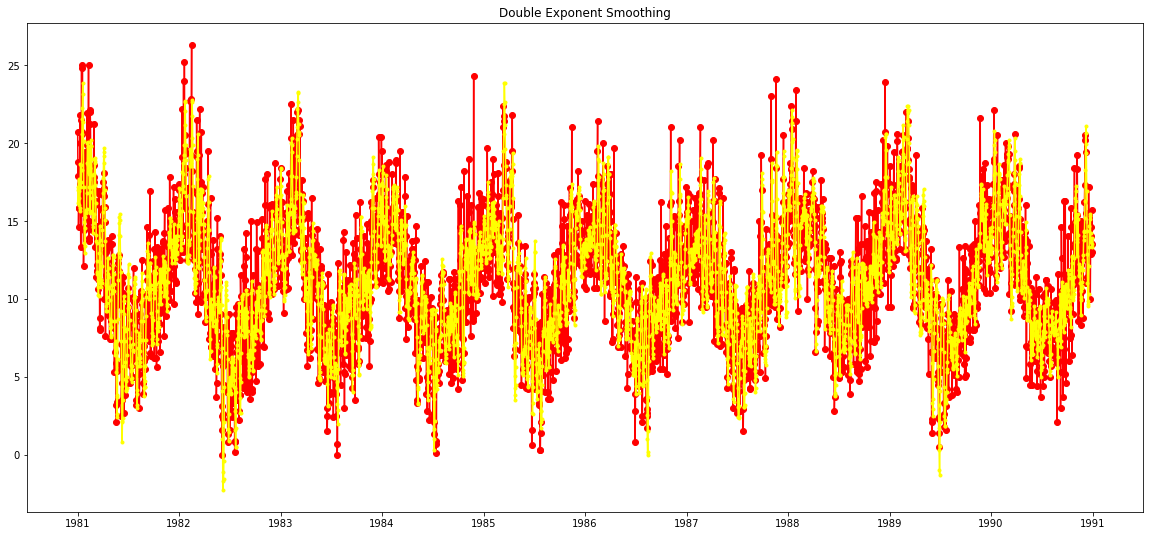

In [25]:
#plot the actual and smooth data

fig,ax = plt.subplots(1,1,figsize=(20, 9))
plt.title('Double Exponent Smoothing')
plt.plot(data,marker='o',color='red',label='Actual Temp')
plt.plot(f_dexp, marker='.',color='yellow',label='Double Exp Smoothing [0.2, 0.5]')
plt.show()



#### Triple Exponent Smoothing (trend and seasonality)

In [26]:
# read the data
path="C:\\Users\\Manish\\Downloads\\DS3_C1_S2_Weather_Data_Practice.csv"
elec_data = pd.read_csv(path,index_col='Date',parse_dates=True)

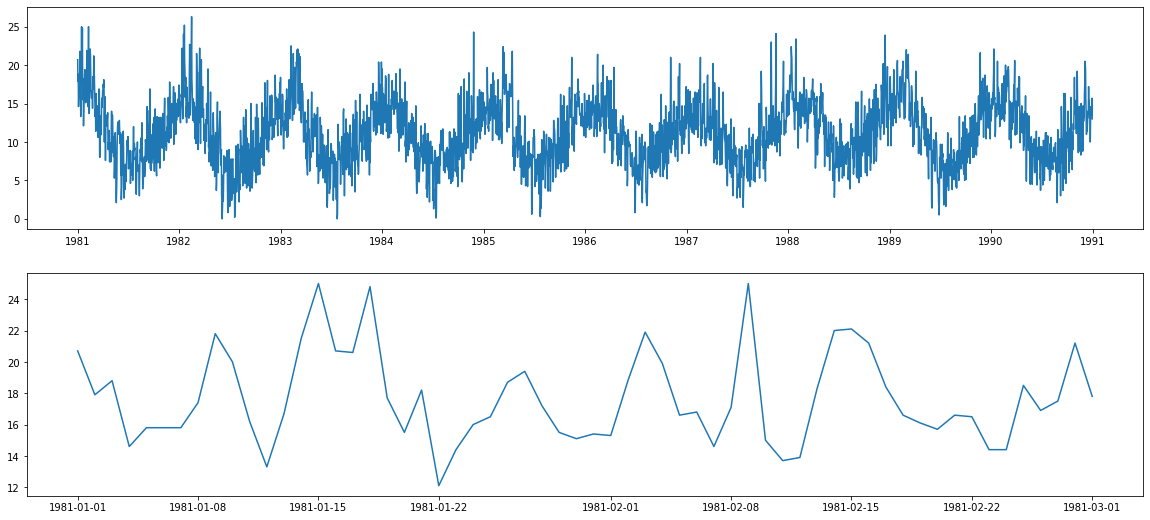

In [27]:
# plot the data
fig,ax = plt.subplots(2,1,figsize=(20, 9))
plt.subplot(211)
plt.plot(elec_data)
plt.subplot(212)
plt.plot(data[0:60])
plt.show()

In [28]:
# build model
model = ExponentialSmoothing(elec_data.values,trend='add',seasonal='add',seasonal_periods=12).fit()

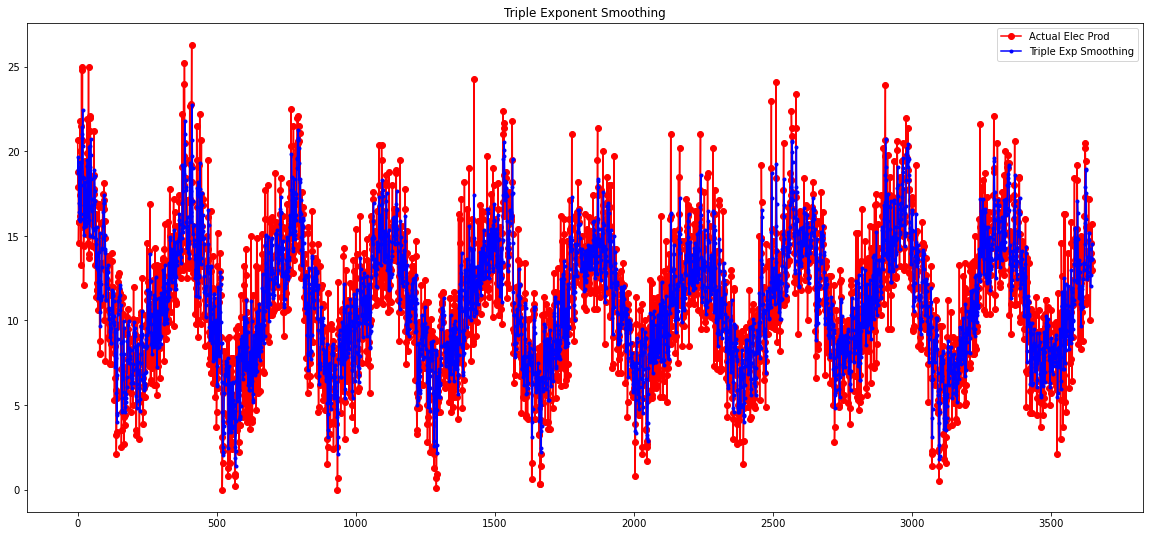

In [29]:
# plot the actual and triple smoothing values

fig,ax = plt.subplots(1,1,figsize=(20, 9))
plt.plot(elec_data.values, marker='o',color='red',label='Actual Elec Prod')
plt.title('Triple Exponent Smoothing')
plt.plot(model.fittedvalues,marker='.',color='blue',label='Triple Exp Smoothing')
plt.legend()
plt.show()
